<a href="https://colab.research.google.com/github/netgvarun2021/Blackbox/blob/main/TextifyProofReading.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Not connected to a GPU


In [3]:
!nvidia-smi

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



In [51]:
import os
import pandas as pd
import spacy
from spacy import displacy
import nltk
from nltk.tokenize import word_tokenize
from google.colab import drive
from nltk.corpus import stopwords
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [8]:
imdb_dir = '/content/gdrive/MyDrive'
dataset_dir = os.path.join(imdb_dir, 'Textify.ai/Textify AI Text Corpus Center (Responses).xlsx')
print(dataset_dir)

/content/gdrive/MyDrive/Textify.ai/Textify AI Text Corpus Center (Responses).xlsx


In [9]:
df = pd.read_excel(dataset_dir)

In [10]:
df.shape

(734, 11)

In [12]:
df.head()

,Timestamp,Contributor,Topic,Writing Style,Essay Text,Essay Grading,University Name,Education Program,Relevant Field (Major/ Subject of study etc),Reference Link,Comments (is something unusual about the essay?)
0,2021-06-20 05:36:05.410,Tin,Bacon,Narrative,"THE ALARM CLOCK IS, TO MANY high school studen...",Average (B-C),Duke University,Bachelors,NaN,http://www.qianmu.org/u/lystu/school/file/0hme...,NaN
1,2021-06-20 05:47:07.236,Tin,“Beyond Plug-and-Chug Math”,Persuasive,I HAVE ALWAYS BEEN A MATH-SCIENCE girl. I sigh...,Average (B-C),MIT - Massachusetts Institute of Technology,Bachelors,Mathematics,http://www.qianmu.org/u/lystu/school/file/0hme...,NaN
2,2021-06-20 06:00:53.430,Tin,“A Different Kind of love”,"Narrative, Personal","WHEN I WAS FOUR YEARS OLD, I fell in love. It ...",Excellent (A+),Stanford University,Bachelors,Spanish Language,http://www.qianmu.org/u/lystu/school/file/0hme...,NaN
3,2021-06-20 06:12:52.684,Tin,“From Flaubert to Frisbee”,Persuasive,"THIS SUMMER, I WENT TO THE governor’s Honors P...",Average (B-C),Brown University,Masters,Literature,http://www.qianmu.org/u/lystu/school/file/0hme...,NaN
4,2021-06-20 06:20:05.473,Tin,Raising the Bar,Narrative,THIS PAST SUMMER I HAD THE opportunity to part...,Average (B-C),NaN,Masters,Engineering and Sciences,http://www.qianmu.org/u/lystu/school/file/0hme...,NaN


In [16]:
df['Essay Grading'].value_counts()

Average (B-C)     401
Excellent (A+)    288
Bad (D-F)          45
Name: Essay Grading, dtype: int64

In [17]:
nlp = spacy.load('en_core_web_sm')


In [18]:
df[:1]['Essay Text'].values[0]

'THE ALARM CLOCK IS, TO MANY high school students, a wailing monstrosity whose purpose is to torture all who are sleep-deprived. Those who believe this are misguided, and are simply viewing the situation from a twisted perspective. For when these imprudent early-risers blearily rub their eyes each morning, and search in vain for whatever is making that earsplitting noise, they are, without a doubt, annoyed. Why? \nIt isn’t because the only thing they desire is to sleep a few extra hours, as many would presume. no, these kids are groggy and irritable because they are waking up to what they think will be another horribly boring day of school. If one of these foolish Sallys or Joes were, say, sleeping comfortably on a Saturday morning, I could certainly see something different happening. A beautiful breakfast of tantalizing vittles—eggs, hash browns, and the like—would be ready and waiting for them on their kitchen tables. But the scrumptious delight to outshine them all would be a slab o

In [19]:
# Create a simple Doc object
doc = nlp(df[:1]['Essay Text'].values[0])

In [ ]:
for token in doc:
    print(f'{token.text:{10}} {token.pos_:{7}} {token.dep_:{7}} {spacy.explain(token.dep_)}')

In [21]:
df_essays = df['Essay Text'].to_frame()

In [22]:
df_essays.head()

,Essay Text
0,"THE ALARM CLOCK IS, TO MANY high school studen..."
1,I HAVE ALWAYS BEEN A MATH-SCIENCE girl. I sigh...
2,"WHEN I WAS FOUR YEARS OLD, I fell in love. It ..."
3,"THIS SUMMER, I WENT TO THE governor’s Honors P..."
4,THIS PAST SUMMER I HAD THE opportunity to part...


In [23]:
#df_essays_mini = df_essays[:3]

In [24]:
#df_essays_mini

# **FEATURE EXTRACTION FROM ESSAY'S ASCII TEST**

## **COUNTING SENTENCES**

In [122]:
def count_sentences(essay):
  doc = nlp(essay)
  doc_sents = [sent for sent in doc.sents]
  return len(doc_sents)


In [123]:
df_essays['SentenceCount'] = df_essays['Essay Text'].apply(count_sentences)

In [27]:
df_essays[:10]

,Essay Text,SentenceCount
0,"THE ALARM CLOCK IS, TO MANY high school studen...",35
1,I HAVE ALWAYS BEEN A MATH-SCIENCE girl. I sigh...,28
2,"WHEN I WAS FOUR YEARS OLD, I fell in love. It ...",40
3,"THIS SUMMER, I WENT TO THE governor’s Honors P...",20
4,THIS PAST SUMMER I HAD THE opportunity to part...,23
5,"My eyes widen. “It’s all Greek to me,” I whisp...",46
6,"I could still hear her words, the words my tea...",31
7,It was a wet and dreary October evening. I sho...,30
8,"Oreos. On the exterior, a firm chocolate crust...",43
9,"Whether I was blowing out candles, writing a l...",21


In [28]:
df_essays.iloc[700].values[0]

'“Jooooorrrrddddannnnn,” my mom screamed with utter fear and panic in her voice. Surprisingly, amongst all of the chaos, her voice was all that I heard. I’m not sure if I was disoriented, bewildered or just in complete shock but at that particular moment, I felt nothing. That feeling of nothingness lasted 2.5 seconds because then the excruciating pain began. My knee felt as if someone had hit me with a Mack truck going 90 miles per hour. For the first time in my life, I had experienced real pain. I was 10 years old and I shattered my knee.\nI have always been a well rounded student. My focus has always been on my school and everything that comes along with it, which included extra-curricular activities. I was an avid gymnast. I had been in gymnastics since I was 3 years old. My parents were both extremely athletic. My dad was an All-American college football player and my mom was a cheerleader, so it was only fitting that I participated in something athletically strenuous as well. They

## **COUNTING WORDS w/o STOP WORDS**

In [29]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [30]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [34]:
word_tokens = word_tokenize(df_essays.iloc[729].values[0])
stop_words = set(stopwords.words('english'))

In [35]:
def count_non_stop_words(essay):
  word_tokens = word_tokenize(essay)
  filtered_sentence = [w for w in word_tokens if not w.lower() in stop_words]
  return len(filtered_sentence)


In [36]:
df_essays['WordCount'] = df_essays['Essay Text'].apply(count_non_stop_words)

In [37]:
df_essays.head()

,Essay Text,SentenceCount,WordCount
0,"THE ALARM CLOCK IS, TO MANY high school studen...",35,462
1,I HAVE ALWAYS BEEN A MATH-SCIENCE girl. I sigh...,28,309
2,"WHEN I WAS FOUR YEARS OLD, I fell in love. It ...",40,532
3,"THIS SUMMER, I WENT TO THE governor’s Honors P...",20,308
4,THIS PAST SUMMER I HAD THE opportunity to part...,23,320


## **COUNTING PARTS OF SPEECH**

In [38]:
def count_verb(essay):
  doc=nlp(essay)
  pos_counts = doc.count_by(spacy.attrs.POS)
  for k,v in sorted(pos_counts.items()):
    if doc.vocab[k] == 'VERB':
      return v

def count_noun(essay):
  doc=nlp(essay)
  pos_counts = doc.count_by(spacy.attrs.POS)
  for k,v in sorted(pos_counts.items()):
    if doc.vocab[k] == 'NOUN':
      return v

def count_adjective(essay):
  doc=nlp(essay)
  pos_counts = doc.count_by(spacy.attrs.POS)
  for k,v in sorted(pos_counts.items()):
    if doc.vocab[k] == 'ADJ':
      return v   

def count_adverb(essay):
  doc=nlp(essay)
  pos_counts = doc.count_by(spacy.attrs.POS)
  for k,v in sorted(pos_counts.items()):
    if doc.vocab[k] == 'ADV':
      return v    

def count_pronoun(essay):
  doc=nlp(essay)
  pos_counts = doc.count_by(spacy.attrs.POS)
  for k,v in sorted(pos_counts.items()):
    if doc.vocab[k] == 'PRON':
      return v  

def count_punctuations(essay):
  doc=nlp(essay)
  pos_counts = doc.count_by(spacy.attrs.POS)
  for k,v in sorted(pos_counts.items()):
    if doc.vocab[k] == 'PUNCT':
      return v                        

In [39]:
df_essays['VerbCount'] = df_essays['Essay Text'].apply(count_verb)
df_essays['NounCount'] = df_essays['Essay Text'].apply(count_noun)
df_essays['AdjCount'] = df_essays['Essay Text'].apply(count_adjective)
df_essays['AdverbCount'] = df_essays['Essay Text'].apply(count_adverb)
df_essays['PronounCount'] = df_essays['Essay Text'].apply(count_pronoun)
df_essays['PunctCount'] = df_essays['Essay Text'].apply(count_punctuations)


In [40]:
df_essays.head()

,Essay Text,SentenceCount,WordCount,VerbCount,NounCount,AdjCount,AdverbCount,PronounCount,PunctCount
0,"THE ALARM CLOCK IS, TO MANY high school studen...",35,462,102,142,70,46,46,101
1,I HAVE ALWAYS BEEN A MATH-SCIENCE girl. I sigh...,28,309,75,113,45,30,46,53
2,"WHEN I WAS FOUR YEARS OLD, I fell in love. It ...",40,532,107,146,82,50,79,113
3,"THIS SUMMER, I WENT TO THE governor’s Honors P...",20,308,69,89,40,37,43,63
4,THIS PAST SUMMER I HAD THE opportunity to part...,23,320,53,107,35,28,28,63


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa86d453e50>,
      dtype=object)

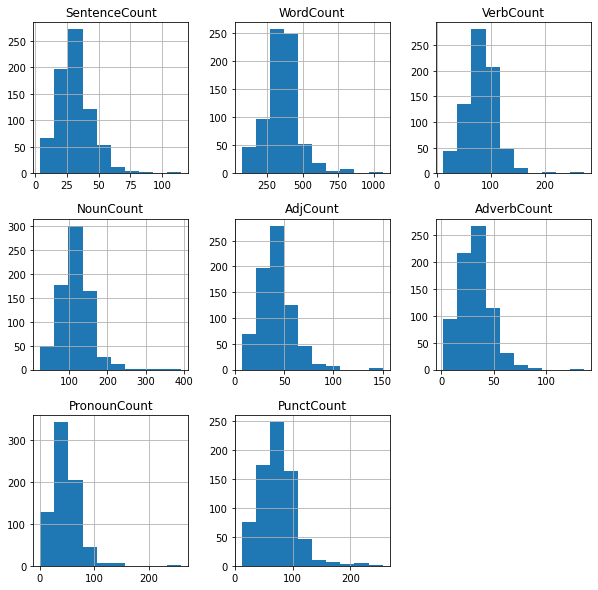

In [41]:
df_essays.hist(figsize=(10,10))

# Day 2

In [43]:
df_essays['Essay Grading'] = df['Essay Grading'] 

In [124]:
df_essays.head()

,Essay Text,SentenceCount,WordCount,VerbCount,NounCount,AdjCount,AdverbCount,PronounCount,PunctCount,Essay Grading,SentenceCategory
0,"THE ALARM CLOCK IS, TO MANY high school studen...",35,462,102,142,70,46,46,101,Average (B-C),31-40
1,I HAVE ALWAYS BEEN A MATH-SCIENCE girl. I sigh...,28,309,75,113,45,30,46,53,Average (B-C),21-30
2,"WHEN I WAS FOUR YEARS OLD, I fell in love. It ...",40,532,107,146,82,50,79,113,Excellent (A+),31-40
3,"THIS SUMMER, I WENT TO THE governor’s Honors P...",20,308,69,89,40,37,43,63,Average (B-C),11-20
4,THIS PAST SUMMER I HAD THE opportunity to part...,23,320,53,107,35,28,28,63,Average (B-C),21-30


In [172]:
df_essays['Essay Grading'].value_counts()

Average (B-C)     401
Excellent (A+)    288
Bad (D-F)          45
Name: Essay Grading, dtype: int64

In [267]:
len(df_essays)

734

# **Grades Distribution by Sentence Counts**

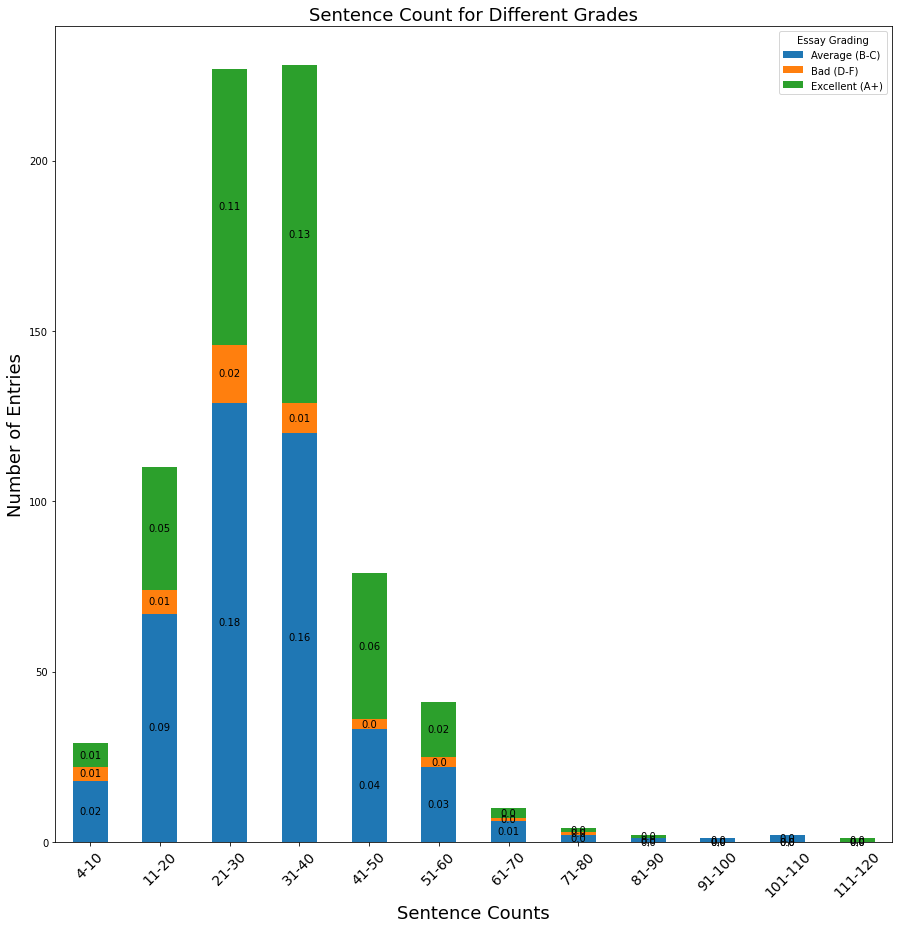

In [273]:
bins = np.arange(0, 13) * 10
df_essays['SentenceCategory'] = np.digitize(df_essays['SentenceCount'], bins, right=True)
df_essays.sort_values(by = 'SentenceCount',inplace=True)
dicton = {1:'4-10',2:'11-20',3:'21-30',4:'31-40',5:'41-50',6:'51-60',7:'61-70',8:'71-80',9:'81-90',10:'91-100',11:'101-110',12:'111-120'}
df_essays["SentenceCategory"].replace(dicton, inplace=True)
counts = df_essays.groupby(['SentenceCategory','Essay Grading'],sort=False).SentenceCount.count().unstack()
df_essays.drop(['SentenceCategory'], axis=1,inplace=True)
counts.replace(np.nan,0,inplace=True)
ax = counts.plot.bar(stacked=True,figsize=(15,15),width = 0.5)
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.text(x+width/2, 
            y+height/2, 
            #'{:.0000f} '.format(height/len(df_essays)),
            str(round(height/len(df_essays),2)), 
            horizontalalignment='center', 
            verticalalignment='center')
plt.title('Sentence Count for Different Grades',fontsize=18)
plt.xlabel('Sentence Counts',fontsize=18)
plt.xticks(fontsize=14,rotation=45)
plt.ylabel('Number of Entries',fontsize=18)
plt.show()	



# **Grades Distribution by other Counts**

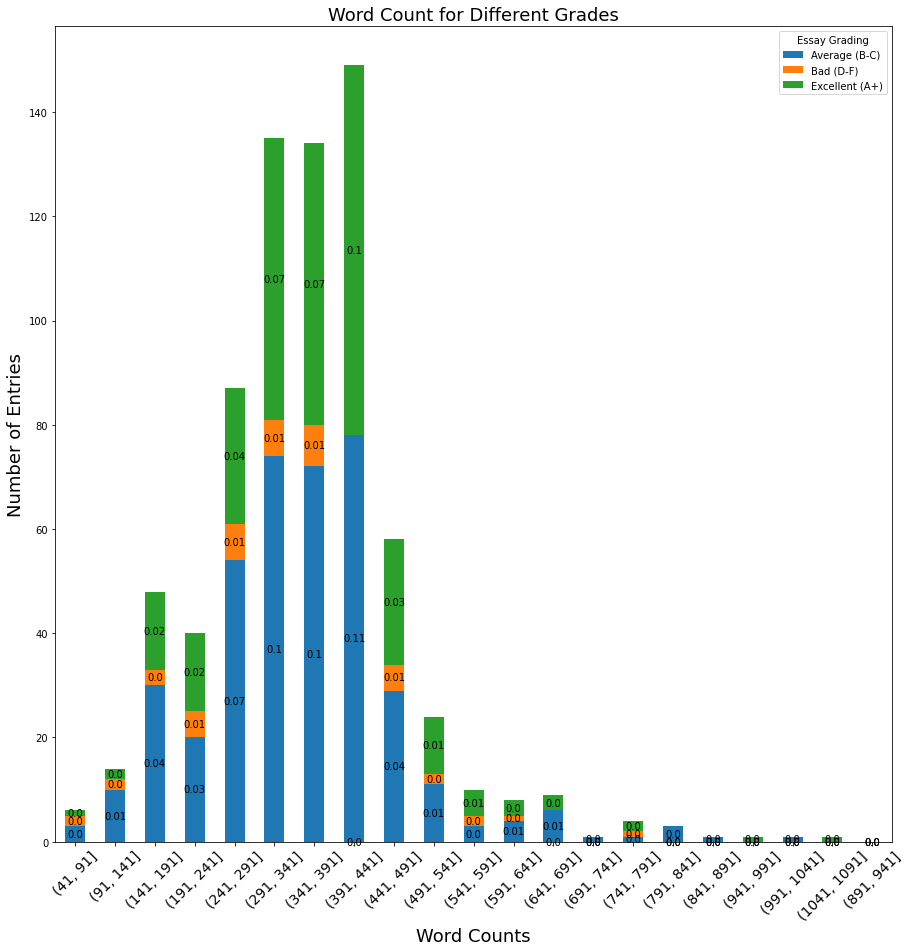

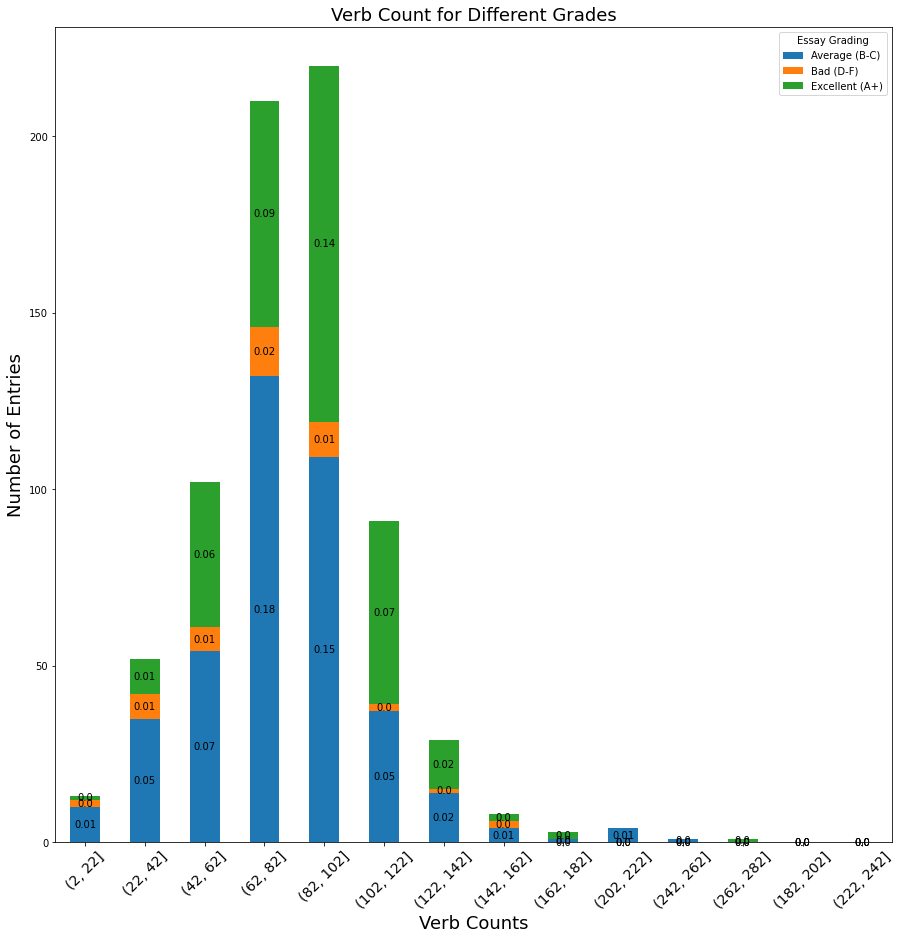

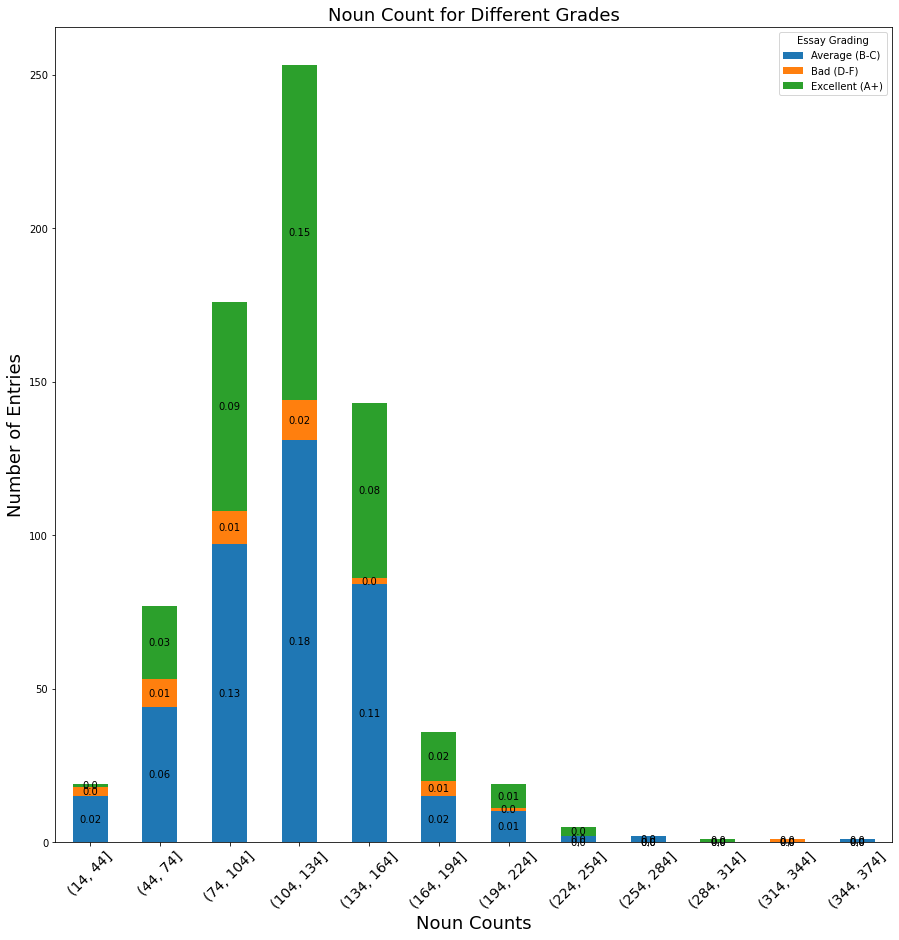

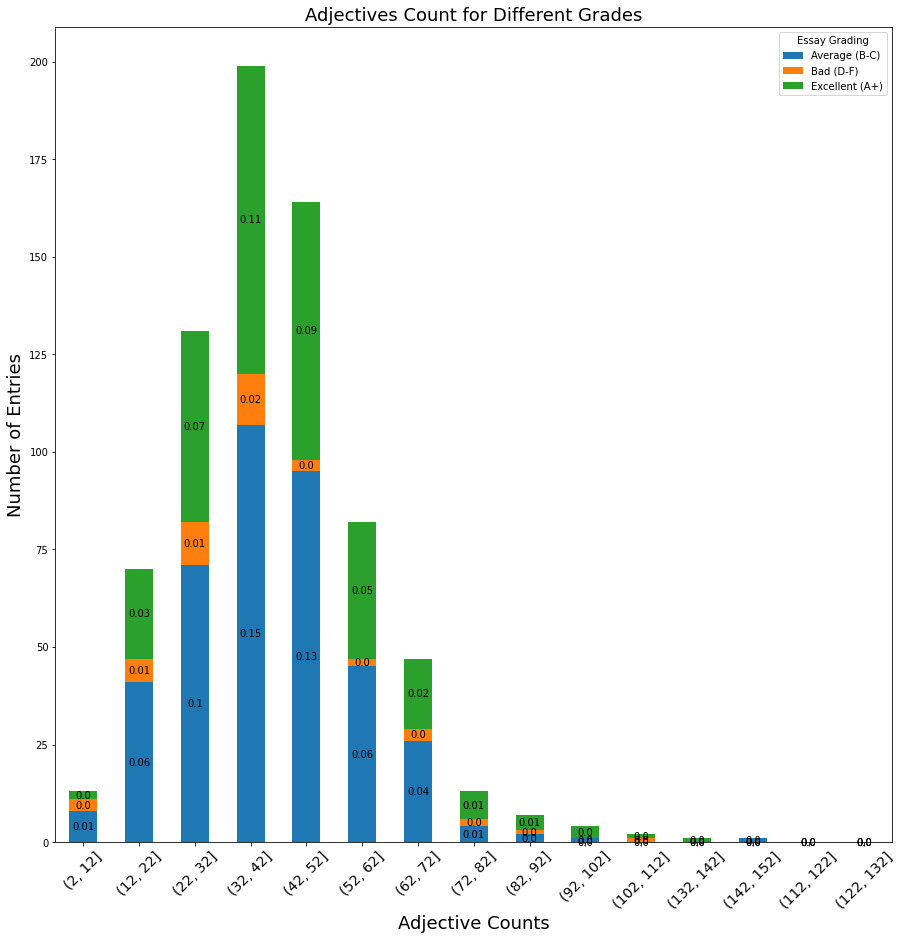

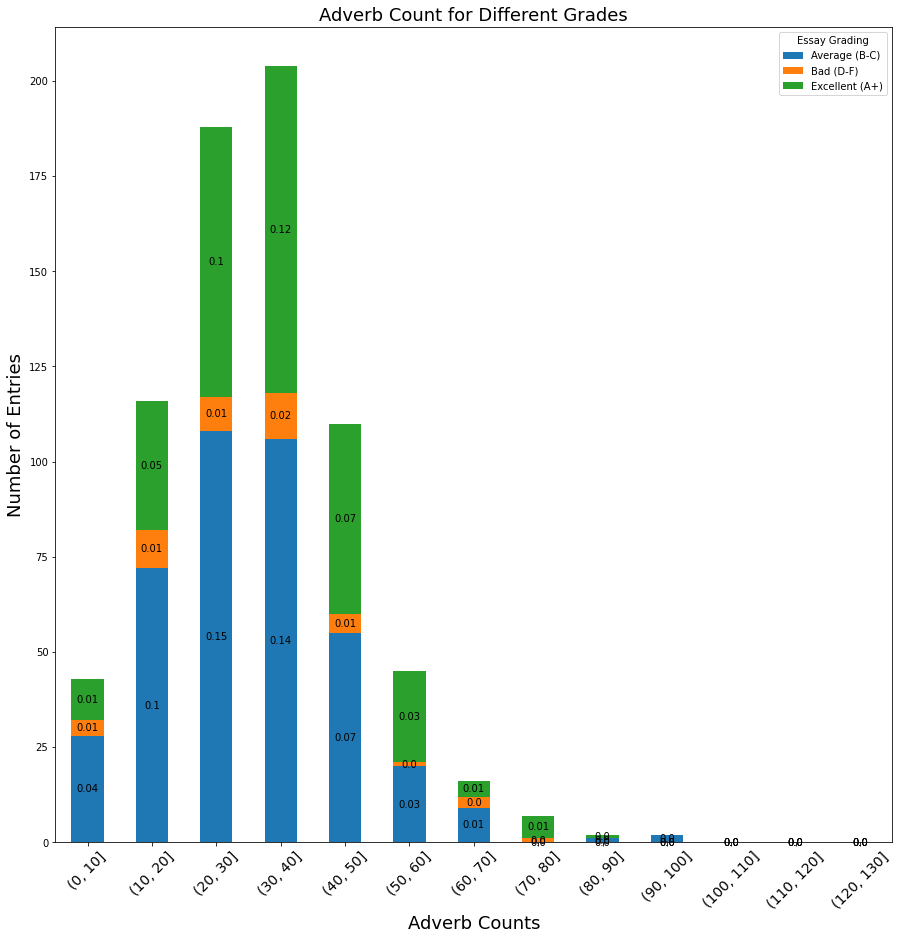

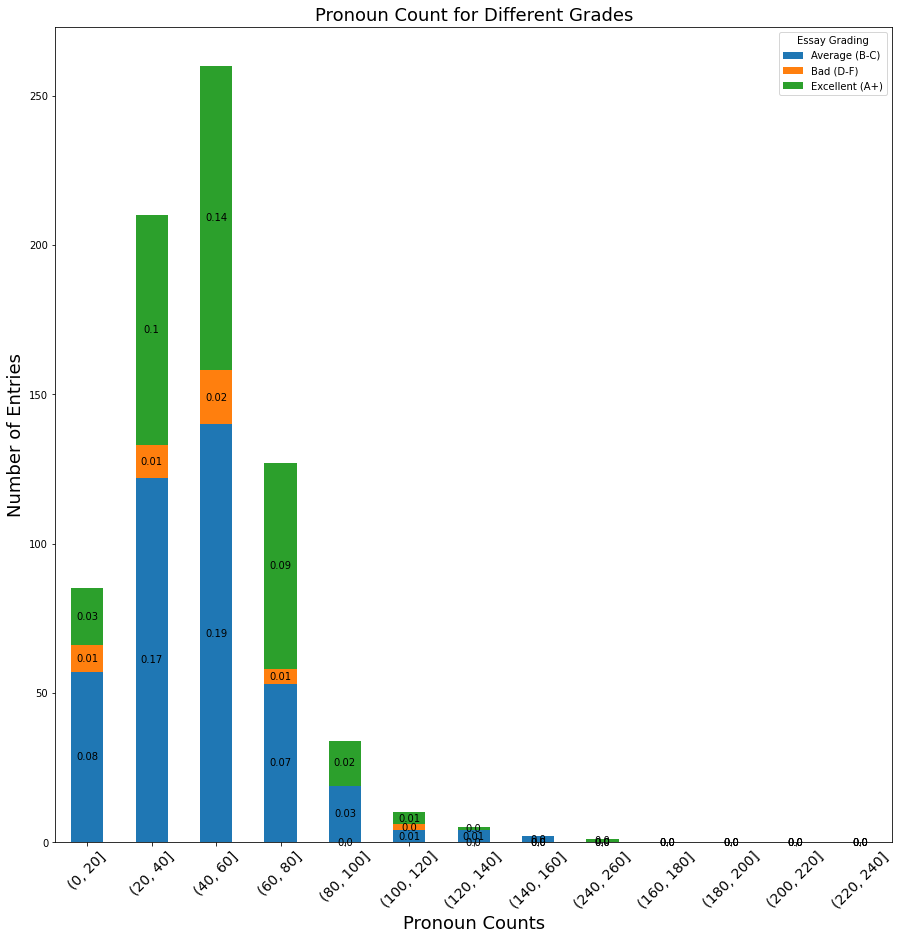

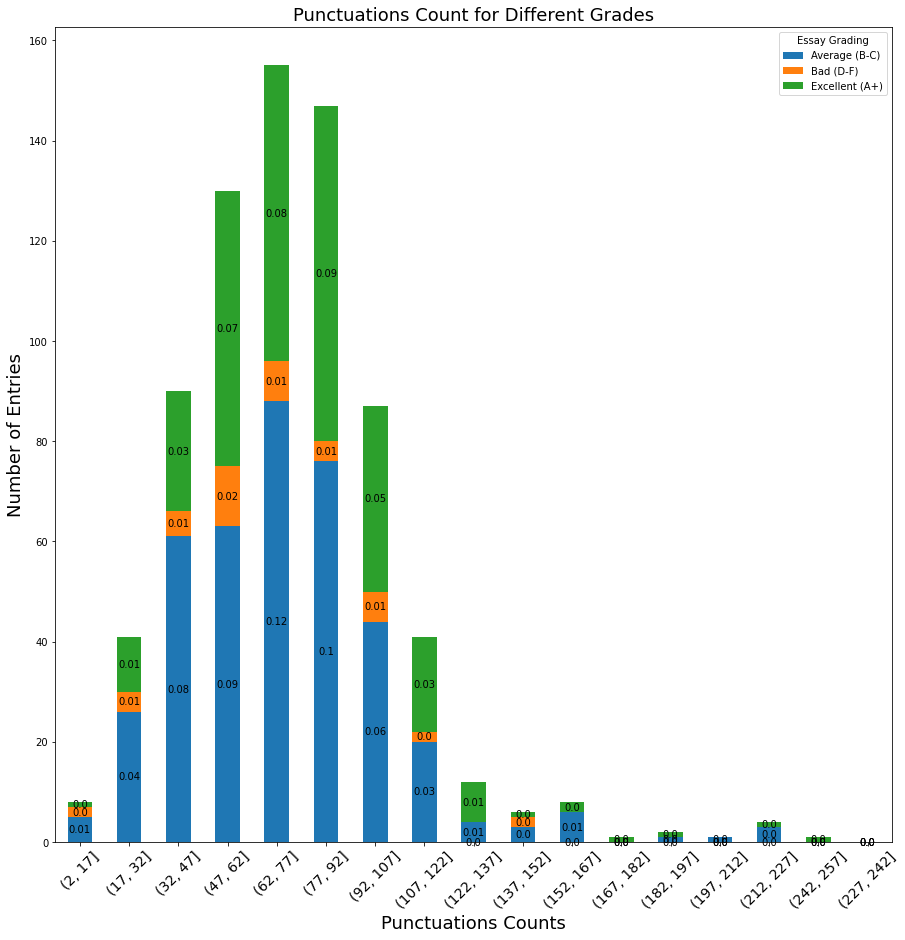

In [274]:
def display_stack_bar(col1,col2,title,xlabel,buffer,binsize):
  bins_created = np.arange(min(df_essays[col1])-buffer, max(df_essays[col1]) + buffer, binsize) 
  df_essays[col2] = pd.cut(df_essays[col1], bins=bins_created)
  df_essays.sort_values(by = col1,inplace=True)
  counts = df_essays.groupby([col2,'Essay Grading'],sort=False).SentenceCount.count().unstack()
  df_essays.drop([col2], axis=1,inplace=True)
  counts.replace(np.nan,0,inplace=True)
  #counts.plot(kind='bar', stacked=True,figsize=(10,10))
  ax = counts.plot.bar(stacked=True,figsize=(15,15),width = 0.5)
  for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.text(x+width/2, 
            y+height/2, 
            str(round(height/len(df_essays),2)), 
            horizontalalignment='center', 
            verticalalignment='center')  
  plt.title(title,fontsize=18)
  plt.xlabel(xlabel,fontsize=18)
  plt.xticks(fontsize=14,rotation=45)
  plt.ylabel('Number of Entries',fontsize=18)
  plt.show()	


display_stack_bar('WordCount','WordCountCategory','Word Count for Different Grades','Word Counts',30,50)
display_stack_bar('VerbCount','VerbCountCategory','Verb Count for Different Grades','Verb Counts',10,20)
display_stack_bar('NounCount','NounCountCategory','Noun Count for Different Grades','Noun Counts',10,30)
display_stack_bar('AdjCount','AdjectivesCountCategory','Adjectives Count for Different Grades','Adjective Counts',5,10)
display_stack_bar('AdverbCount','AdverbCountCategory','Adverb Count for Different Grades','Adverb Counts',2,10)
display_stack_bar('PronounCount','PronounCountCategory','Pronoun Count for Different Grades','Pronoun Counts',1,20)
display_stack_bar('PunctCount','PunctCountCategory','Punctuations Count for Different Grades','Punctuations Counts',10,15)

In [283]:
from pyenchant import enchant

ModuleNotFoundError: ignored

In [278]:
!pip3 install pyenchant

In [281]:
!pip install python-enchant

ERROR: Could not find a version that satisfies the requirement python-enchant (from versions: none)
ERROR: No matching distribution found for python-enchant
